Loading Titanic dataset from public source...
Dataset loaded.
Visualizing missing values before cleaning...


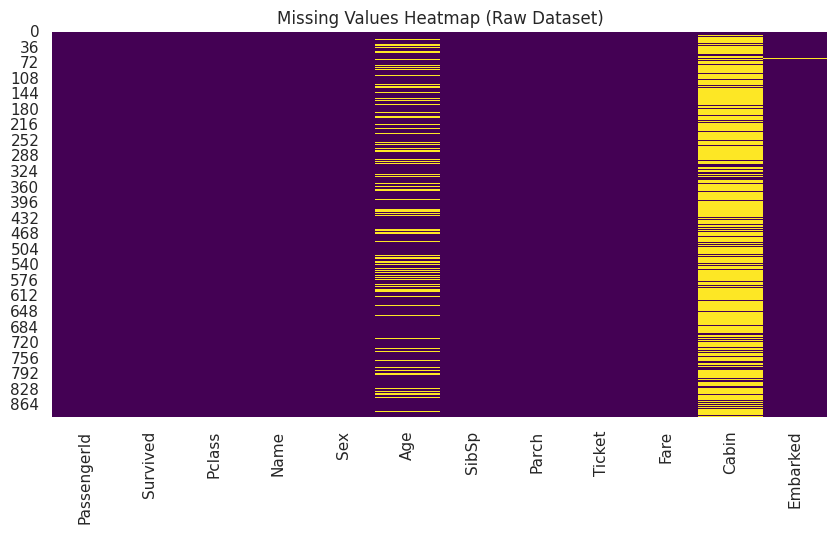

Cleaning missing values and encoding features...
Data cleaned and processed.
Splitting data for training and validation...
Training Random Forest model...
Model trained.
Evaluating model and generating metrics...

Validation accuracy: 81.56%

Classification Report:


,precision,recall,f1-score,support
0,0.83,0.87,0.85,110.00
1,0.78,0.72,0.75,69.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.81,0.80,0.80,179.00
weighted avg,0.81,0.82,0.81,179.00



Sample predictions for random passengers from the validation set:


Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Actual,Predicted,Survival Probability
3.0,1.0,27.0,0.0,0.0,7.9250,0.0,Survived,Survived,69.0%
3.0,0.0,28.0,1.0,1.0,15.2458,1.0,Survived,Survived,70.0%
3.0,0.0,28.0,1.0,0.0,16.1000,0.0,Did NOT Survive,Did NOT Survive,1.0%
3.0,0.0,29.0,0.0,0.0,7.8750,0.0,Did NOT Survive,Did NOT Survive,12.7%
2.0,1.0,28.0,0.0,0.0,33.0000,0.0,Survived,Survived,92.0%


Preparing all exploratory and model visualizations...


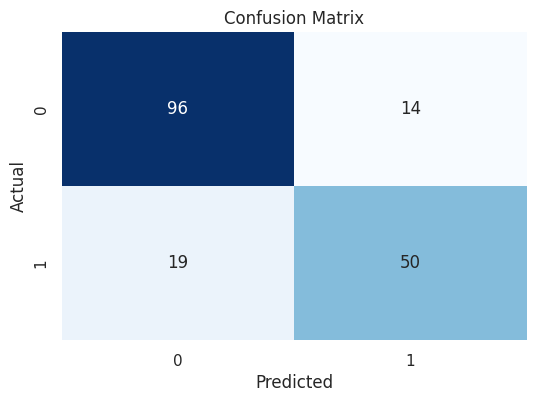

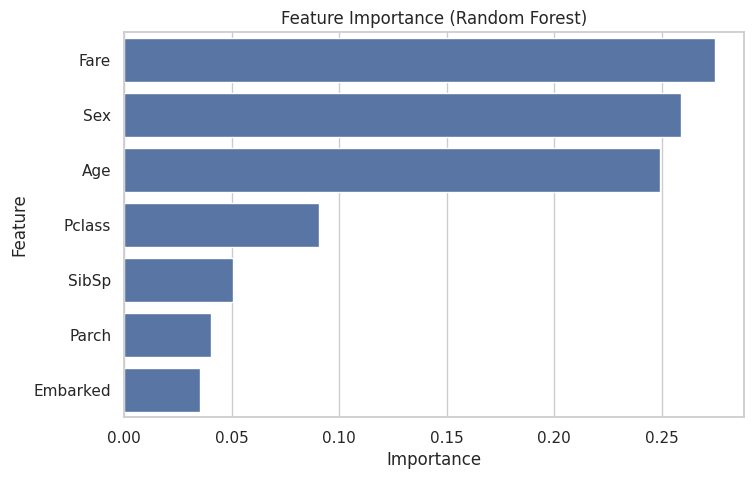

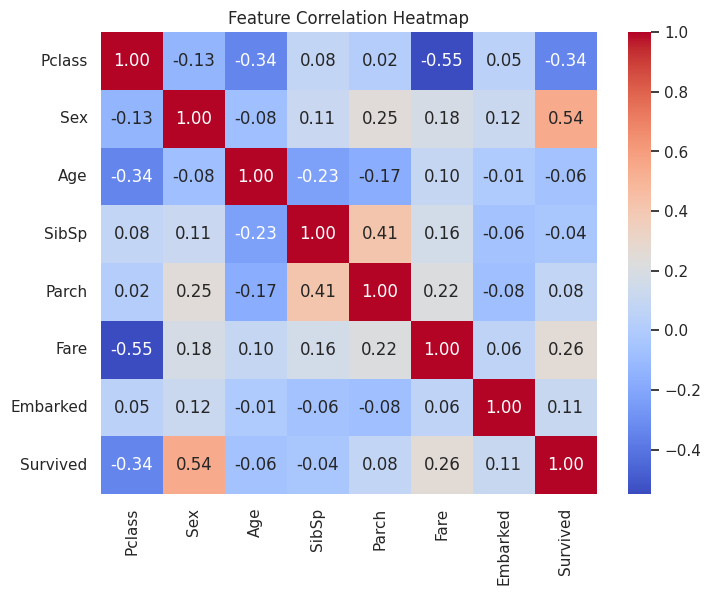

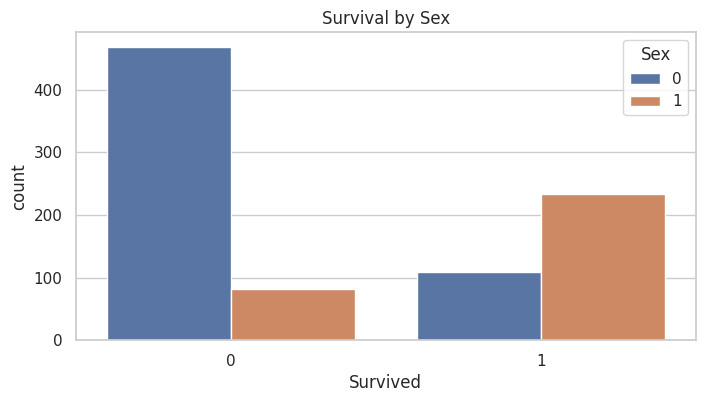

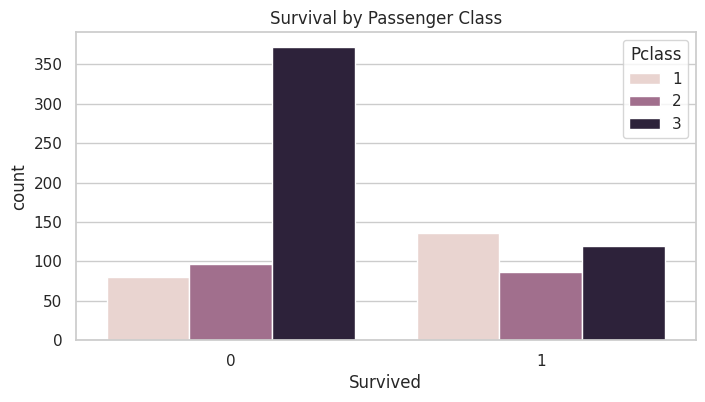

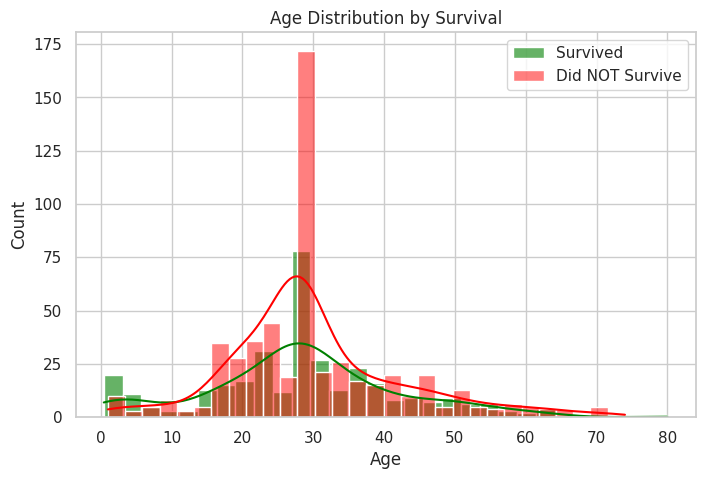

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display, HTML

# Set plot and display options
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# STEP 1: Load the Titanic dataset from a public GitHub source
print("Loading Titanic dataset from public source...")
time.sleep(1.2)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print("Dataset loaded.")
time.sleep(0.8)

# STEP 2: Visualize missing values BEFORE cleaning.
print("Visualizing missing values before cleaning...")
time.sleep(0.8)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Raw Dataset)')
plt.show()

# STEP 3: Clean data and encode features
print("Cleaning missing values and encoding features...")
time.sleep(1.4)
# Fill missing numerical values with median, categorical with mode
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Convert sex to number: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# Convert embarked to number: S=0, C=1, Q=2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
# Drop columns that are text-heavy or have too many missing values
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
print("Data cleaned and processed.")
time.sleep(1.2)

# STEP 4: Split the dataset into training and validation sets for model evaluation
print("Splitting data for training and validation...")
time.sleep(0.8)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']
# Stratified split ensures class balance in both sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# STEP 5: Train a Random Forest Classifier
print("Training Random Forest model...")
time.sleep(1.5)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained.")
time.sleep(0.7)

# STEP 6: Evaluate the model
print("Evaluating model and generating metrics...")
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
time.sleep(1.1)

# Print validation accuracy and display the classification report as a table
print('\nValidation accuracy: {:.2f}%'.format(acc * 100))
print("\nClassification Report:")
display(HTML(pd.DataFrame(classification_report(y_val, y_pred, output_dict=True))
             .T.to_html(float_format="{:.2f}".format)))

# STEP 7: Show random sample predictions (in a readable table)
# Select 5 random samples from the validation set for demonstration
sampled_idx = np.random.choice(X_val.index, size=5, replace=False)
results = []
for idx in sampled_idx:
    passenger = X_val.loc[idx]
    # Predict using a DataFrame to avoid sklearn warnings
    single_passenger_df = pd.DataFrame([passenger.values], columns=features)
    pred = model.predict(single_passenger_df)[0]
    proba = model.predict_proba(single_passenger_df)[0][1]
    results.append({
        **passenger.to_dict(),
        'Actual': 'Survived' if y_val.loc[idx] == 1 else 'Did NOT Survive',
        'Predicted': 'Survived' if pred == 1 else 'Did NOT Survive',
        'Survival Probability': f"{proba:.1%}"
    })
results_df = pd.DataFrame(results)
pretty_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
               'Actual', 'Predicted', 'Survival Probability']

print("\nSample predictions for random passengers from the validation set:")
display(HTML(results_df[pretty_cols].to_html(index=False)))

# STEP 8: Generate all visualizations for EDA and model results (display AFTER all print output)

print("Preparing all exploratory and model visualizations...")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, orient='h')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + ['Survived']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival by Class
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Age distribution by survival
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True, bins=30, alpha=0.6)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Did NOT Survive', kde=True, bins=30, alpha=0.5)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()
